<a href="https://colab.research.google.com/github/kingspy89/ml_learnings-/blob/main/function_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [6]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [12]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

/tmp/ipython-input-468893779.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

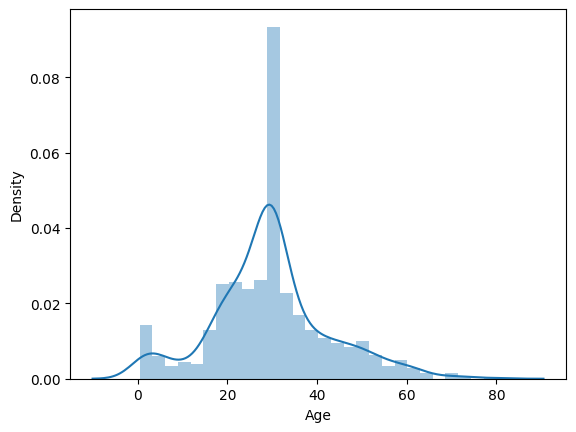

In [14]:
sns.distplot(X_train['Age'])

((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

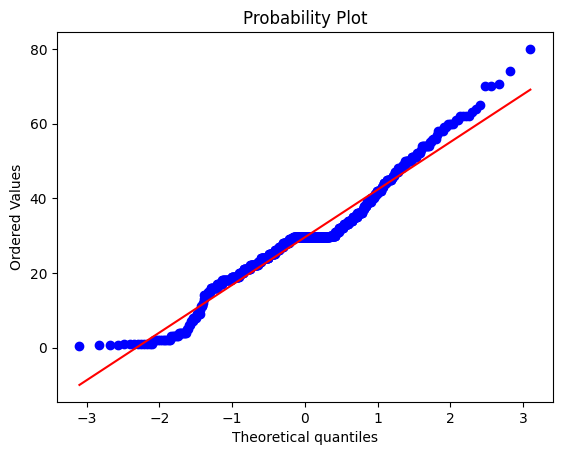

In [15]:
stats.probplot(X_train['Age'], dist="norm", plot=plt)

/tmp/ipython-input-1281908091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

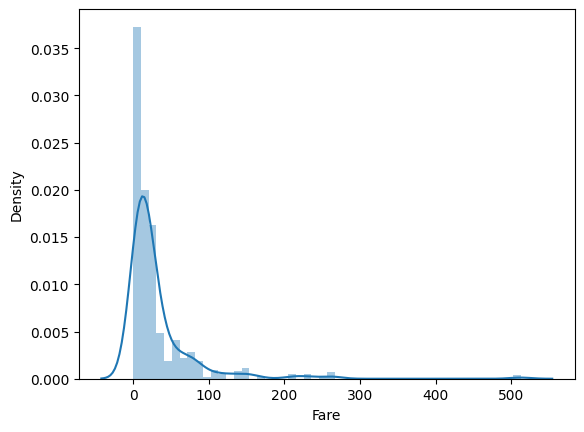

In [16]:
sns.distplot(X_train['Fare'])

((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

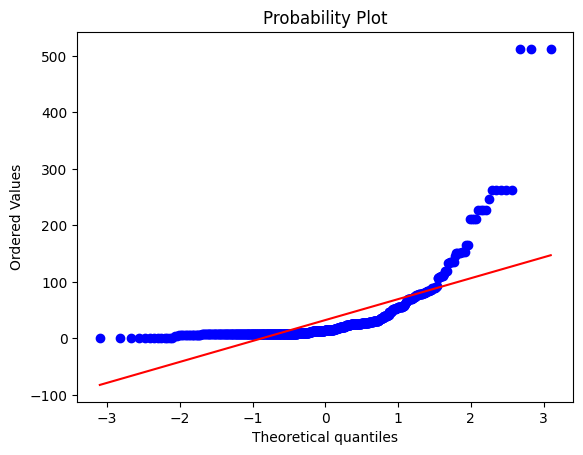

In [17]:
stats.probplot(X_train['Fare'], dist="norm", plot=plt)

In [18]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

In [21]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.6480446927374302

In [24]:
accuracy_score(y_test,y_pred2)

0.664804469273743

In [25]:
trf = FunctionTransformer(func=np.log1p)

In [26]:
X_train_transfromed= trf.fit_transform(X_train)
X_test_transfromed= trf.transform(X_test)

In [27]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

In [28]:
clf.fit(X_train_transfromed,y_train)
clf2.fit(X_train_transfromed,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = clf.predict(X_test_transfromed)
y_pred2 = clf2.predict(X_test_transfromed)

In [30]:
accuracy_score(y_test,y_pred)

0.6815642458100558

In [31]:
accuracy_score(y_test,y_pred2)

0.6871508379888268

((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

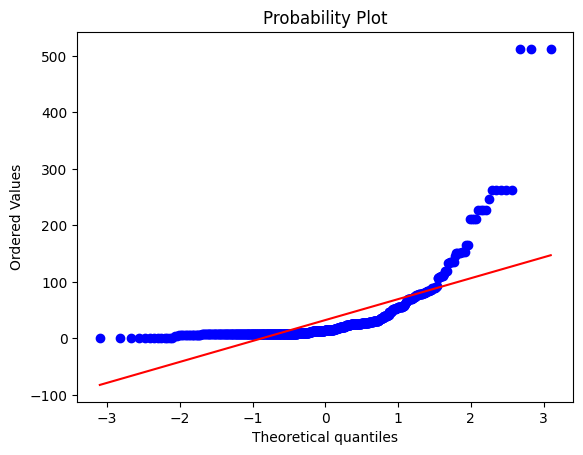

In [33]:
stats.probplot(X_train['Fare'], dist="norm", plot=plt)

((array([-3.09833772e+00, -2.82529557e+00, -2.67239243e+00, -2.56428702e+00,
         -2.47977990e+00, -2.40996845e+00, -2.35023723e+00, -2.29787334e+00,
         -2.25114194e+00, -2.20886405e+00, -2.17020067e+00, -2.13453273e+00,
         -2.10138998e+00, -2.07040647e+00, -2.04129166e+00, -2.01381086e+00,
         -1.98777170e+00, -1.96301446e+00, -1.93940499e+00, -1.91682952e+00,
         -1.89519069e+00, -1.87440451e+00, -1.85439799e+00, -1.83510731e+00,
         -1.81647630e+00, -1.79845528e+00, -1.78100007e+00, -1.76407122e+00,
         -1.74763334e+00, -1.73165455e+00, -1.71610603e+00, -1.70096166e+00,
         -1.68619765e+00, -1.67179230e+00, -1.65772574e+00, -1.64397975e+00,
         -1.63053756e+00, -1.61738369e+00, -1.60450386e+00, -1.59188484e+00,
         -1.57951433e+00, -1.56738092e+00, -1.55547396e+00, -1.54378354e+00,
         -1.53230037e+00, -1.52101577e+00, -1.50992160e+00, -1.49901023e+00,
         -1.48827446e+00, -1.47770753e+00, -1.46730308e+00, -1.45705508e+00,

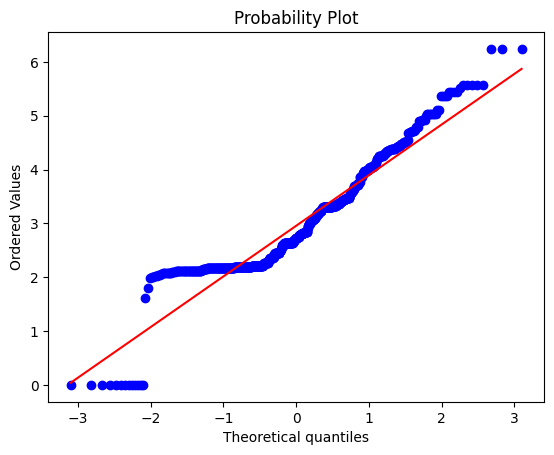

In [34]:
stats.probplot(X_train_transfromed['Fare'], dist="norm", plot=plt)

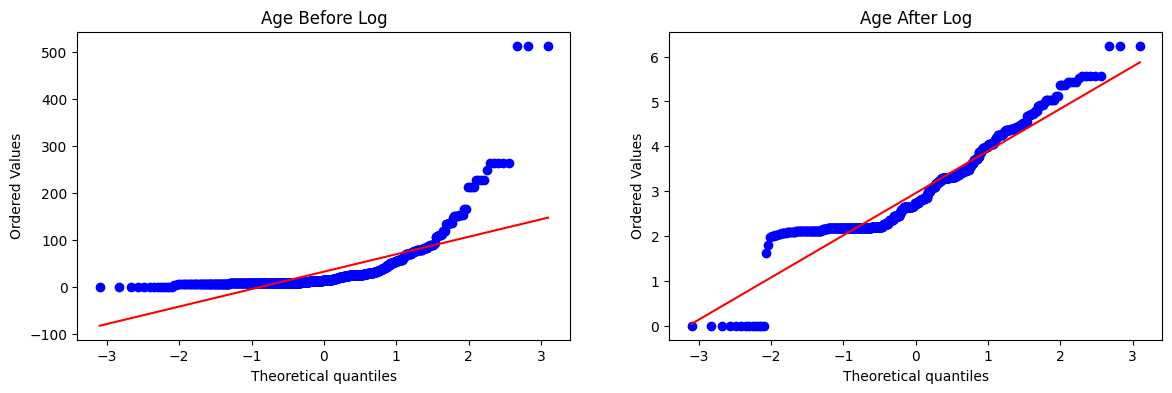

In [37]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transfromed['Fare'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()